# Einführung in die Neuroinformatik - 9. Aufgabenblatt
## Gruppe Q: Dominik Authaler, Marco Deuscher, Carolin Schindler

### Aufgabe 1: Gewichtsinitialisierung

#### 1. Betrachten, was bei ungünstiger Initialisierung passiert
##### a) Wie ist $u_i^{(1)}$ verteilt?
$u_i^{(1)} = \sum_{k=1}^m x_k\cdot w_{ki}^{(1)} + b_i^{(1)} = \sum_{k=1}^m x_k\cdot N(0, 1) + 0 = \sum_{x_k = 1} N(0,1) = N(\frac{m}{2}\cdot 0, \sqrt{\frac{m}{2}\cdot 1^2}) = N(0, \sqrt{\frac{m}{2}}) = N(0, 5\sqrt{6}) \approx N(0, 12.25)$
##### b) Zu welchem Problem kann das eben berechnete Ergebnis führen?
$y_i^{(1)} = f(u_i^{(1)}) = \tanh{u_i^{(1)}}$ und $|\tanh{x}| = 1$ für etwa $|x| > 2$. Daher ändert sich die Ausgabe für $u_i^{(1)} > 2$ nicht, obwohl sich $u_i^{(1)}$ geändert hat. Da für N(0, 12.25) Werte von ca. -30 bis +30 wahrscheinlich sind und Werte im Intervall $[-2, 2]$ kaum wahrscheinlicher sind als Werte aushalb des Intervalls, ist die Wahrscheinlichkeit hoch, dass $|y_i^{(1)}|$ konstant $1$ ist und somit das Lernen keinen Effekt zeigt.
##### c) Wie ist $u_i{(1)}$ mit dieser Konfiguration verteilt?
$u_i^{(1)} = N(\frac{m}{2}\cdot 0, \sqrt{\frac{m}{2}\cdot \frac{1}{n_{in}}}) = N(0, \sqrt{\frac{m}{2\cdot m}}) = N(0, \sqrt{\frac{1}{2}}) \approx N(0, 0.707)$
##### d) Welche Vorteile hat diese Verteilung für die Initialisierung der Gewichte im Vergleich zu einer unveränderten Normalisierung?
Der Vorteil liegt darin, dass z.B. hier Werte außerhalb des Intervall $[-2, 2]$ mit einer Wahrscheinlichkeit von 0%, also nie auftreten und dafür die anderen Werte, insbesondere in der Nähe von Null, mit einer höhren Wahrscheinlichkeit auftreten. Dadurch tritt das oben beschrieben Problem auch nicht im kleinen Stil bzw. durch "unglücklichen Zufall" auf. 

#### 2. Welche Vertelung passt zur Initialierungsstrategier $I$ und welche zu $II$?
A: Standardnormalverteilung $N(0,1)$    
B: skalierte Standardnormalverteilung $N(0, \frac{1}{\sqrt{n_{in}}})$  
Für A ist $|y_i^{(1)}| \approx 1$ am wahrscheinlichsten und da $y_i^{(1)} = f(u_i^{(1)}) = \tanh{u_i^{(1)}}$, muss $|u_i^{(1)}| > 2$ sehr wahrscheinlich sein. Für B sind die Werte von $y_i^{(1)}$ im Intervall $[-1, 1]$ ziemlich gleichverteilt, daher muss $|u_i^{(1)}| < 2$ sein und für Werte um Null etwa die gleiche Auftrittswahrscheinlichkeit besitzen. Daher ergibt sich oben genannte Zuordnung.

#### 3. Erkläre, welches Problem man damit zu lösen versucht und warum die Gleichung einen möglichen Kompromiss darstellt. 
XXX

### Aufgabe 2: Regularisierung

#### 1. veränderte Kostenfunktion
##### a) Zeige, dass sich für ein einzelnes Gewicht die neue Lernregel ergibt.
$\frac{\partial E(w(t))}{\partial w_{ij}^{(l)}} = \frac{\partial E_0(w(t))}{\partial w_{ij}^{(l)}} + \frac{\partial}{\partial w_{ij}^{(l)}} (\frac{\lambda}{2}\sum_{l=1}^{L}\sum_{i}\sum_{j}(w_{ij}^{(l)})^2) = \frac{\partial E_0(w(t))}{\partial w_{ij}^{(l)}} + \lambda\cdot w_{ij}^{(l)}$  
$w(t+1) = w(t) -\eta\cdot\nabla E(w(t)) = w(t) -\eta\cdot (\nabla E_0(w(t)) + \lambda\cdot w(t)) = (1-\eta\cdot\lambda)\cdot w(t) - \eta\cdot\nabla E_0(w(t))$
##### b) Gewichte mit weight decacy
###### i) Welchen Wert nimmt das Gewicht bei $w(10)$ an?
$w(t+1) = (1-0,8\cdot0,5)\cdot w(t) = 0,6\cdot w(t)$  
$w(10) = 0,6\cdot w(9) = 0,6\cdot(0,6\cdot w(8)) = 0,6^{10}\cdot w(0) \approx 0,0121$  
[$w(t+1) = 0,6^{t+1}\cdot w(0)$]
###### ii) Mit welcher Rate nimmt das Gewicht ab?
Das Gewicht nimmt exponentiell ab.
###### iii) Zeige, dass sich das Gewicht in zunehmenden Iterationen der Null annähert.
$\lim_{t \to \infty} w(t) = \lim_{t \to \infty} 0,6^{t}\cdot w(0) = 2\cdot\lim_{t \to \infty} 0,6^{t} = 2\cdot 0 = 0$
###### iv) Argumentiere, warum die Gleichung nun nicht mehr notwendigerweise gilt.
$w(t+1) = 0,6\cdot w(t) + 0,8\cdot \nabla E_0(w(t)) = 0,6^{t+1}\cdot w(0) + 0,8\cdot \nabla E_0(w(t))$  
$\lim_{t \to \infty} w(t) = 2\cdot\lim_{t \to \infty} 0,6^{t} + 0,8 \cdot\lim_{t \to \infty} \nabla E_0(w(t-1)) = 2\cdot\lim_{t \to \infty} (0,6^{t} + 0,4 \nabla E_0(w(t-1)))$  
Ist nun beispielsweise $\nabla E_0(w(t-1)) = E_r(t) - \frac{0,6^{t}}{0,4}$, so ist $\lim_{t \to \infty} w(t) = 2\cdot\lim_{t \to \infty} (0,6^{t} + 0,4 (E_r(t) - \frac{0,6^{t}}{0,4})) = 2\cdot\lim_{t \to \infty} (0,4\cdot E_r(t)) = 0,8\cdot E_r(t\rightarrow\infty)$ und $E_r(t\rightarrow\infty)$ muss nicht gleich Null sein.
##### c) Wenn wir nun jedoch die Lernregel mit Regularisierung verwenden, hilft uns das dann dabei, das Problem aus Aufgabe 1 einzudämmen und wenn ja warum?
Ja, da $w(t)$ im Update nun nicht mehr mit $1$, sondern mit $1-\eta\cdot\lambda < 1$ eingeht. Dadurch wird $|w(t)|$ verkleinert und die Problematik, dass $|w(t)|$ dauerhaft $> 2$ wird eingedämmt.  

#### 2. Behauptung stützen
inkrementelle Lernregel vom 3. Aufgabenblatt:  
$w(t+1) = w(t) + \eta \cdot (T_{\mu}-f(w \cdot x_{\mu} + b))\cdot f'(w \cdot x_{\mu} + b) \cdot x_{\mu}$  
$b(t+1) = b(t) + \eta \cdot (T_{\mu}-f(w \cdot x_{\mu} + b))\cdot f'(w \cdot x_{\mu} + b)$  
Der Unterschied zwischen $w(t+1)$ und $b(t+1)$ liegt darin, dass $b(t+1)$ im Gegensatz zu $w(t+1)$ nicht direkt von der Eingabe $x_{\mu}$ beeinflusst wird. Dadurch wird der Bias weniger durch verrauschte Trainingssamples mit Eingangssignal $x_{\mu}$ beeinflusst.

#### 3. Skizziere im zweidimensionalen Raum wie sich die Fehlerfunktion für steigendes $\lambda$ verhält.
XXX

#### 4. Effekt der Regularisierung anhand eines Beispiels

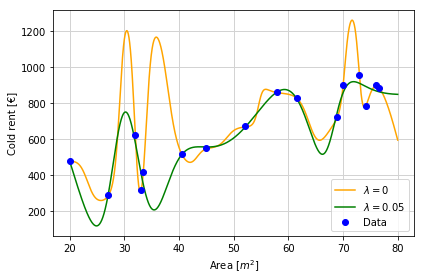

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as K

area = np.array([68.9, 40.5, 33.42, 73, 74.11, 76, 61.51, 52, 70, 76.6, 20, 32, 58, 45, 27, 33], np.float64)
price = np.array([720, 520, 420, 955, 785, 897, 830, 670, 900, 885, 480, 620, 860, 550, 290, 320], np.float64)

#standardisieren der Daten (Mittelwert = 0, Standardabweichung = 1)
scaler = StandardScaler()
area_re = area.reshape(-1, 1)
scaler.fit(area_re)
area_stand = scaler.transform(area_re)
price_re = price.reshape(-1, 1)
price_stand = scaler.transform(price_re)
price_stand = price_stand.reshape(1,-1)[0]

#Konfiguration und Trainieren des Netzwerk
def train_network(reg, area, price, newAreas):
    #Start fresh and at least try to get reproducible results
    tf.reset_default_graph()
    K.clear_session()
    tf.set_random_seed(42)
    np.random.seed(42)
        
    #parameters
    in_dim = len(area[0])
    initializer = tf.keras.initializers.glorot_normal(seed=42)
    opt = optimizers.Adam(lr=0.1)
    model = tf.keras.models.Sequential()
    
    #hidden layer with input layer
    model.add(layers.Dense(input_dim=in_dim,
                                 units=50,
                                 activation='tanh',
                                 kernel_initializer = initializer,
                                 kernel_regularizer = regularizers.l2(reg/2)))
    
    #output layer
    model.add(layers.Dense(units=1, activation='linear'))
    
    #train
    model.compile(optimizer = opt, loss='mse')
    model.fit(area, price, epochs=30000, batch_size=len(price), verbose = 0)

    #predict
    newPrices = model.predict(newAreas)        
    return newPrices

#Netzwerk trainieren (lambda = 0, lambda = 0.05) und Netzwerkausgaben berechnen (x = 20, 20.01, 20.02, ..., 80)
X = np.arange(start=20, stop=80.01, step=0.01)
X_re = X.reshape(-1,1)
X_stand = scaler.transform(X_re)
Prices0_stand = train_network(0, area_stand, price_stand, X_stand)
Prices0 = scaler.inverse_transform(Prices0_stand)
Prices05_stand = train_network(0.05, area_stand, price_stand, X_stand)
Prices05 = scaler.inverse_transform(Prices05_stand)

#Ergebnis graphisch darstellen
plt.xlabel("Area [$m^2$]")
plt.ylabel("Cold rent [€]")
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(X, Prices0, color="orange", label='$\lambda = 0$')
plt.plot(X, Prices05, color="green", label='$\lambda = 0.05$')
plt.plot(area, price, 'ro', color="blue", label="Data")

plt.tight_layout()
plt.legend()